# REGRESSION MODEL (use of MSE,RMetc)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

In [74]:
data = pd.read_csv("/Users/saurabh/Downloads/Sarthak/Placement/Projects/BostonHousing.csv")

In [76]:
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [78]:
data.shape

(506, 14)

In [82]:
data.size 

7084

In [104]:
data.rename(columns={'medv':'price'},inplace='True')

In [107]:
data.dropna()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [109]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [112]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [117]:
correlation=data.corr()

<Axes: >

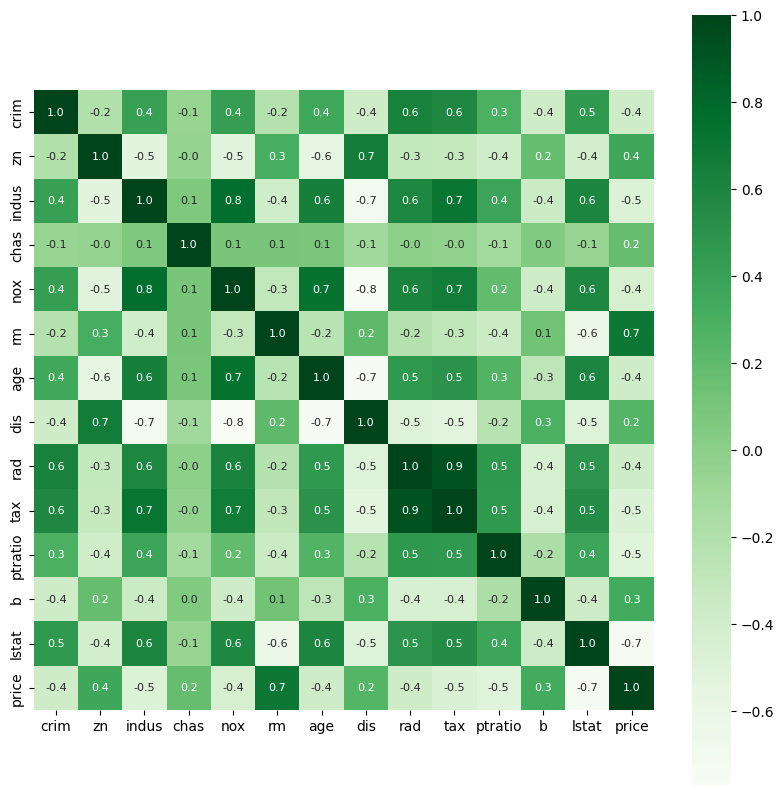

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws = {'size':8},cmap='Greens')

In [167]:
x=data.drop(columns='price',axis=1)

In [169]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [171]:
y=data['price']

In [193]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [203]:
x_train.shape

(404, 13)

In [205]:
x_test.shape

(102, 13)

# MODEL TRAINING
XGBoost Regressor

In [215]:
model = XGBRegressor()

In [217]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [220]:
training_data_pred= model.predict(x_train)

In [222]:
training_data_pred

array([23.112196 , 20.992601 , 20.10438  , 34.67932  , 13.920501 ,
       13.499354 , 21.998383 , 15.206723 , 10.89543  , 22.67402  ,
       13.795236 ,  5.602332 , 29.808502 , 49.98666  , 34.89634  ,
       20.594336 , 23.388903 , 19.2118   , 32.69294  , 19.604128 ,
       26.978151 ,  8.405952 , 46.00062  , 21.70406  , 27.084402 ,
       19.372278 , 19.297894 , 24.79984  , 22.608278 , 31.707775 ,
       18.53683  ,  8.703393 , 17.40025  , 23.698814 , 13.29729  ,
       10.504759 , 12.693588 , 24.994888 , 19.694864 , 14.911037 ,
       24.20254  , 24.991112 , 14.901547 , 16.987965 , 15.592753 ,
       12.704759 , 24.505623 , 15.007718 , 49.999355 , 17.509344 ,
       21.18844  , 31.999287 , 15.606071 , 22.902134 , 19.309835 ,
       18.697083 , 23.302961 , 37.19767  , 30.102247 , 33.117855 ,
       20.993683 , 50.00471  , 13.40048  ,  5.002565 , 16.50862  ,
        8.4016905, 28.651423 , 19.49218  , 20.595366 , 45.404697 ,
       39.808857 , 33.4055   , 19.81498  , 33.406376 , 25.3020

In [225]:
# R Squared Error

In [229]:
score1 = metrics.r2_score(y_train,training_data_pred)

In [243]:
print("R Squared Error: ", score1)

R Squared Error:  0.9999980039471451


In [245]:
score2 = metrics.mean_absolute_error(y_train,training_data_pred)

In [247]:
print("Mean Absolute Error: ",score2)

Mean Absolute Error:  0.0091330346494618


In [261]:
test_data_pred= model.predict(x_test)

In [259]:
test_data_pred

array([22.007828 , 21.22598  , 30.466019 , 27.735027 ,  9.134951 ,
       12.740403 , 25.738058 , 27.750889 , 25.364376 , 20.229292 ,
       27.821787 , 24.7761   , 19.771252 , 20.497349 , 12.970438 ,
       22.86288  , 19.605635 , 10.677987 ,  8.277654 , 15.529657 ,
       22.842052 , 20.002996 , 34.06762  , 18.943192 , 15.624948 ,
       18.787666 , 46.0246   , 33.05114  , 34.804283 , 19.070232 ,
       17.53711  , 20.27066  , 31.102339 , 24.026129 , 12.199101 ,
       18.224184 , 10.182956 , 21.252314 , 22.891352 , 21.458113 ,
       26.451164 , 12.1898775, 27.141438 ,  8.322471 , 21.356699 ,
       12.768549 , 35.221687 , 14.574406 , 32.06173  , 15.088605 ,
       31.076805 , 26.808199 ,  6.1558666, 34.42615  , 25.135347 ,
       19.508772 , 19.424906 , 19.58183  , 16.680052 , 22.962534 ,
       20.904106 , 21.24     , 18.46788  , 29.243906 , 33.434864 ,
       26.021257 , 49.91979  , 25.905489 ,  9.713634 , 24.058743 ,
       16.63922  ,  9.0341625, 13.197622 , 18.80479  , 26.9856

In [264]:
score1_test = metrics.r2_score(y_test,test_data_pred)

In [266]:
score1_test

0.9051721149855378

In [268]:
score2_test = metrics.mean_absolute_error(y_test,test_data_pred)

In [270]:
score2_test

2.0748727686264927

# VISUALISATION 

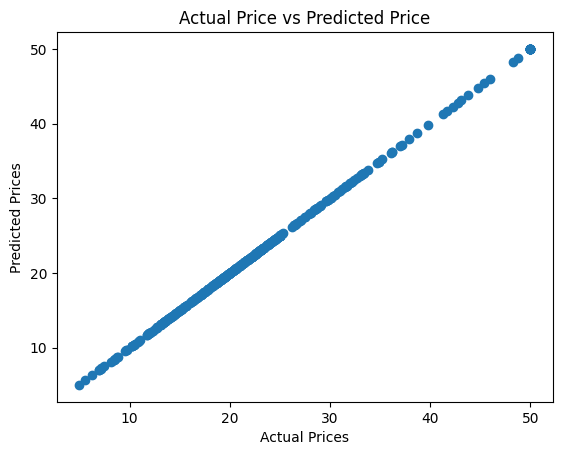

In [281]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

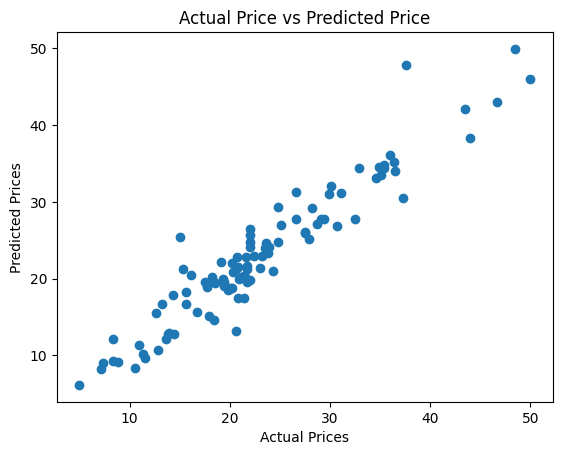

In [283]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()